In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# def reduce_mem_usage(df):
    
    
#     start_mem = df.memory_usage().sum() / 1024**2
    
#     for col in df.columns:
#         col_type = df[col].dtype
        
#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max() 
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.info(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                     elif (c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max):
#                           df[col] = df[col].astype(np.int16)
#                     elif (c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max):
#                            df[col] = df[col].astype(np.int32) 
#                     elif (c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max):
#                            df[col] = df[col].astype(np.int64) 
#                 else:
#                     #if c_min > np.finfo(np.float16).min and c_max < np.flinfo(np.float16).max:
#                     #    df[col] = df[col].astype(np.float16) 
#                     #el 
#                     if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                         df[col] = df[col].astype(np.float32)
                        
#                     else:
#                         df[col] = df[col].astype(np.float64)
#            #else:
#               #df[col] = df[col].astype('category')
#         end_men = df.memory_usage().sum() / 1024**2 
#         print("memory usage of dataframe is {:.2f} MB --> {:.2f} Mb {Decreased by {:.1f}%})".format(
#         start_men, end_men,100 * (start_men - end_men) / start_men)) 
#         return df
                    

In [3]:
cab_data = pd.read_csv("uberDataset.csv")
# cab_data = reduce_mem_usage(cab_data)
cab_data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
cab_data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [5]:
cab_data.shape

(1156, 7)

In [6]:
cab_data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
cab_data.isnull().values.any()

True

In [9]:
cab_data.isnull().values.sum()

507

In [14]:
df=cab_data.dropna()
df.isnull().values.any()

False

In [15]:
cab_data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [16]:
# number count is decrese
df.describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [18]:
un_start_destination = cab_data["START"].dropna()
unique_start = set(un_start_destination)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [19]:
# it tell the len of unique_Start
len(unique_start)

177

In [21]:
# total of unique stop destination 
stop_destination = cab_data['STOP'].dropna() 
unique_stop = set(stop_destination)
len(unique_stop)


188

In [23]:
cab_data[cab_data['START']== 'San Francisco']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [28]:
#popular starting point  and also counting max accurrence
starting_point = cab_data["START"].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(["START"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index': 'starting_destination','START':'Count'})
df.loc[df['Count']== max(df['Count'])] 


,starting_destination,Count
0,Cary,201


In [29]:
starting_point = cab_data["START"].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(["START"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index': 'starting_destination','START':'Count'})
df.loc[df['Count']== min(df['Count'])] 


,starting_destination,Count
90,NOMA,1
91,Santa Clara,1
92,Sunnyside,1
93,Wake Co.,1
94,Fuquay-Varina,1
...,...,...
172,Florence,1
173,Ridgeland,1
174,Daytona Beach,1
175,Sky Lake,1


In [31]:
df = cab_data.dropna()
df = pd.DataFrame(df.groupby(['START',"STOP"]).size())
df = df.rename(columns = {0:'Count'})
df = df.sort_values(['Count'], ascending = False)
df.loc[df['Count'] == max(df['Count'])]

,,Count
START,STOP,
Cary,Morrisville,52


In [34]:
print(np.array(cab_data['PURPOSE'].dropna().unique()))
cab_data['MILES'].groupby(cab_data['PURPOSE']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64

<Axes: xlabel='MILES'>

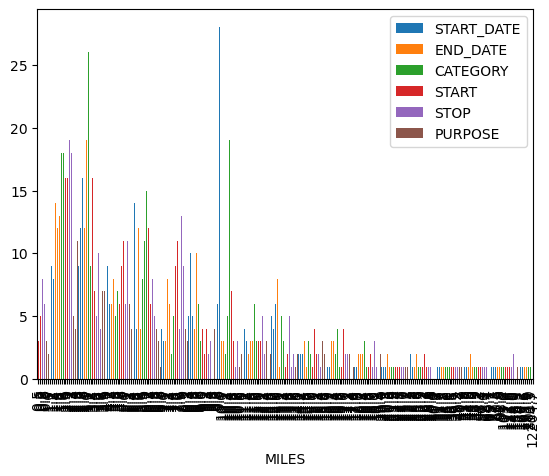

In [11]:
cab_data.groupby('MILES').count().plot.bar()

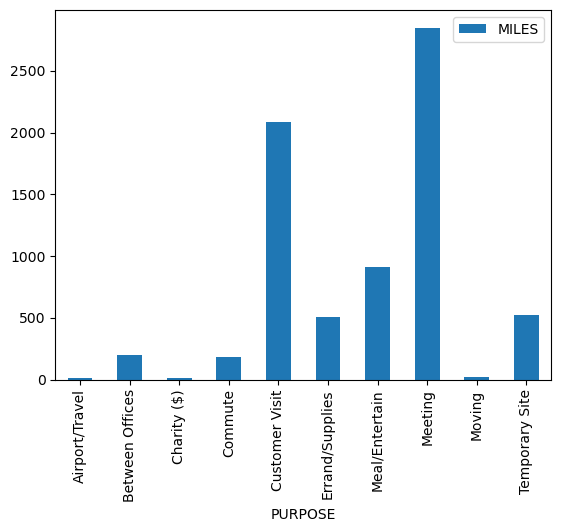

In [35]:
df = pd.DataFrame(cab_data['MILES'].groupby(cab_data['PURPOSE']).sum()) 
df.plot(kind = 'bar')
plt.show()